In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_36716\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[2775]

Unnamed: 0                         2775.000000
EPIC ID                       211392649.000000
Teff                               3222.173300
logg                                  4.929700
Flare #                              25.000000
Observation time                    125.614793
Average flare duration                0.139754
Longest flare duration                0.469942
Shortest flare duration               0.081727
Average percentage increase          51.346542
Highest percentage increase         425.379944
Lowest percentage increase            1.538086
Name: 2775, dtype: float64

In [4]:
flc = from_mast("211392649", mode="LC", mission="K2")

6% (211/3657) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
6% (211/3657) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
5% (116/2487) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
5% (116/2487) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


In [5]:
flc = flc[0]

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

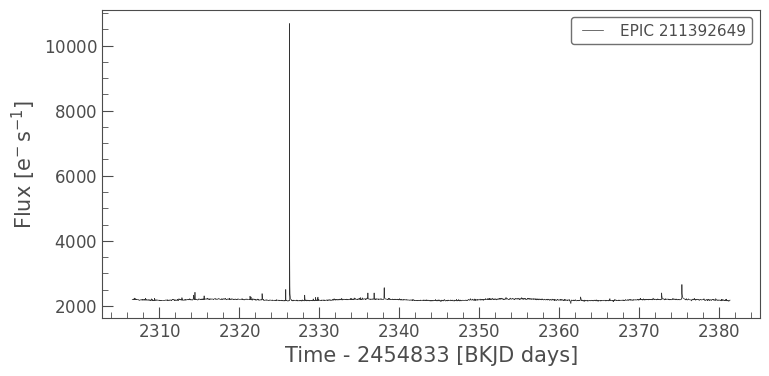

In [6]:
flc.plot()

In [7]:
flc = flc.detrend("savgol")

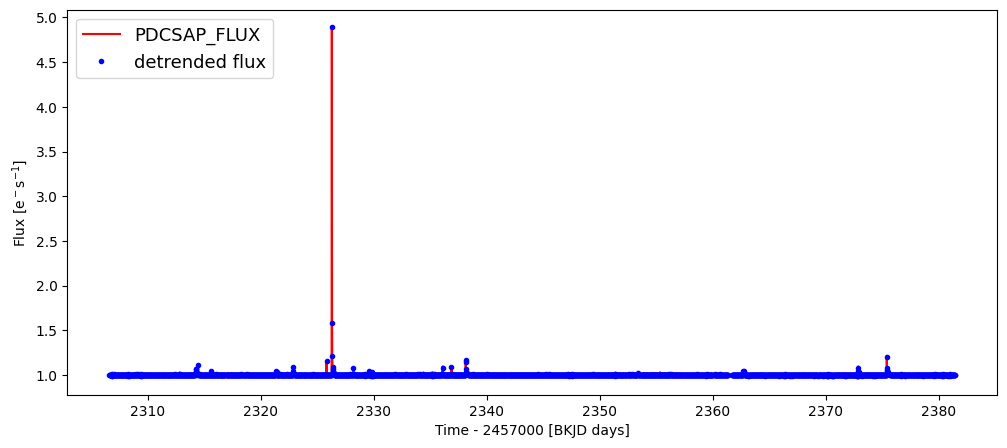

In [8]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
#plt.xlim(3011, 3011.5)
#plt.ylim(.95,1.05)
plt.legend(loc=2,fontsize=13);

In [10]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,360,365,107926,107931,2314.252421,2314.354581,356.41968632587276,5.693763947080464,0.06578230857849121,0.102160,3407.000000
1,755,760,108348,108353,2322.874692,2322.976852,303.37116549916806,4.923032424990439,0.08787035942077637,0.102159,3407.000000
2,913,924,108516,108527,2326.307240,2326.531990,8760.278366950606,4.549591378481593,3.8877105712890625,0.224750,3407.000000
3,1467,1474,109095,109102,2338.137219,2338.280241,810.9138877807434,5.735201134231651,0.16419100761413574,0.143022,3407.000000
4,2562,2567,110298,110303,2362.716507,2362.818666,291.24088953712936,6.232832598588415,0.049208879470825195,0.102158,3407.000000
5,3025,3029,110795,110799,2372.871073,2372.952800,316.37055794560234,5.32837760427977,0.085418701171875,0.081727,3407.000000
6,3140,3148,110918,110926,2375.384183,2375.547637,848.6056837153037,6.256338150967769,0.2067861557006836,0.163454,3407.000000


In [9]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 4 candidate(s) in the (0,1475) gap.
Found 0 candidate(s) in the (1475,2518) gap.
Found 3 candidate(s) in the (2518,3149) gap.
Found 0 candidate(s) in the (3149,3407) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
